In [1]:
# Healthcare Regression model using Synthetic data

In [2]:
# Build Regression model on health data
# Build synthetic data generator

In [3]:
import math
import torch
import torch.nn as nn
from torch.nn import functional as F
import pandas as pd
import numpy as np


In [4]:
# 1. Get disease params for BP, Diabetes, Cholesterol, Thyroid
# 2. Generate data within params - healthy, risky on a spectrum
# 3. Train a model to predict disease
# 4. Look for correlation, cross params
# 5. Start with numbers
# 6. Add image, voice/text
# 7. See how to download html, pdf content and analyze
# 8. 
# 9. 

In [5]:
# 1. Get disease params for BP, Diabetes, Cholesterol, Thyroid

In [6]:
# Thyroid params
# T3, T4, TSH
# TSH 0.3 - 4.0 mU/L,  milliunits per liter
# T3 Total 80 - 215 ng/dL, nanograms per deciliter. Free  1.5-6.0 pg/mL picograms per milliliter
# T4 Total 4.5-12.5 ug/d micrograms. Free 0.8-2.0 ng/dL

In [7]:
sd = np.std([60,80,100,120,140,160,180,200,220,240])
mean = np.mean([60,80,100,120,140,160,180,200,220,240])
print(mean,sd)

150.0 57.445626465380286


In [8]:
sd = np.std([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
mean = np.mean([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
print(mean,sd)

7.5 4.031128874149275


In [9]:
sd = np.std([1,2,3,4,5,6])
mean = np.mean([1,2,3,4,5,6])
print(mean,sd)

3.5 1.707825127659933


In [10]:
# 2. Generate data within params - healthy, risky on a spectrum

In [11]:
t3 = pd.DataFrame(np.random.normal((215+80)/2,60,1000000), columns=['T3'])
t4 = pd.DataFrame(np.random.normal((12.5+4.5)/2,4,1000000), columns=['T4'])
tsh = pd.DataFrame(np.random.normal((4+.3)/2,1.7,1000000), columns=['TSH'])


In [12]:
t4.head()

,T4
0,11.814928
1,4.731583
2,-1.113721
3,10.446345
4,9.598097


In [13]:
conditions = [(t3['T3']<80), ((t3['T3']>=80) & (t3['T3']<=215)), (t3['T3']>215)]
values = ['Low','Normal','High']
t3['T3level'] = np.select(conditions, values)

In [14]:
conditions = [(t4['T4']<4.5), ((t4['T4']>=4.5) & (t4['T4']<=12.5)), (t4['T4']>12.5)]
values = ['Low','Normal','High']
t4['T4level'] = np.select(conditions, values)

In [15]:
conditions = [(tsh['TSH']<0.3), ((tsh['TSH']>=0.3) & (tsh['TSH']<=4)), (tsh['TSH']>4)]
values = ['Low','Normal','High']
tsh['TSHlevel'] = np.select(conditions, values)

In [16]:
thyroid_df = pd.concat([t3,t4,tsh], axis=1, ignore_index=False)

In [17]:
thyroid_df

,T3,T3level,T4,T4level,TSH,TSHlevel
0,4.064681,Low,11.814928,Normal,3.849962,Normal
1,65.888799,Low,4.731583,Normal,3.400606,Normal
2,103.031787,Normal,-1.113721,Low,1.661119,Normal
3,59.263169,Low,10.446345,Normal,2.235381,Normal
4,249.002512,High,9.598097,Normal,4.383761,High
...,...,...,...,...,...,...
999995,205.422025,Normal,11.111521,Normal,2.962130,Normal
999996,181.170244,Normal,9.600984,Normal,1.547436,Normal
999997,191.949480,Normal,12.467323,Normal,-0.106938,Low
999998,131.690919,Normal,7.112430,Normal,1.110117,Normal


In [18]:
conditions = [((thyroid_df['T3level'] == 'Low')&(thyroid_df['T4level'] == 'Low')&(thyroid_df['TSHlevel'] == 'High')), 
              ((thyroid_df['T3level'] == 'High')&(thyroid_df['T4level'] == 'High')&(thyroid_df['TSHlevel'] == 'Low')), 
              ((thyroid_df['T3level'] == 'Normal')&(thyroid_df['T4level'] == 'Normal')&(thyroid_df['TSHlevel'] == 'Normal'))]
values = ['Hypothyroidism','Hyperthyroidism','NormalThyroid']
thyroid_df['ThyroidDisease'] = np.select(conditions, values)

In [19]:
x = thyroid_df[(thyroid_df['T3level'] == 'Low')&(thyroid_df['T4level'] == 'Low')&(thyroid_df['TSHlevel'] == 'High')]

In [20]:
x

,T3,T3level,T4,T4level,TSH,TSHlevel,ThyroidDisease
32,68.595020,Low,4.154889,Low,5.003408,High,Hypothyroidism
122,69.462032,Low,3.542841,Low,5.335574,High,Hypothyroidism
236,63.039229,Low,4.310066,Low,4.440192,High,Hypothyroidism
896,68.462904,Low,-0.287641,Low,5.386042,High,Hypothyroidism
941,66.351829,Low,0.562926,Low,4.239736,High,Hypothyroidism
...,...,...,...,...,...,...,...
998378,71.215955,Low,2.178264,Low,4.236723,High,Hypothyroidism
998942,77.105383,Low,3.343186,Low,5.265565,High,Hypothyroidism
999499,28.539912,Low,-1.104882,Low,6.104867,High,Hypothyroidism
999522,57.641134,Low,3.493726,Low,6.595538,High,Hypothyroidism


In [21]:
thyroid_df

,T3,T3level,T4,T4level,TSH,TSHlevel,ThyroidDisease
0,4.064681,Low,11.814928,Normal,3.849962,Normal,0
1,65.888799,Low,4.731583,Normal,3.400606,Normal,0
2,103.031787,Normal,-1.113721,Low,1.661119,Normal,0
3,59.263169,Low,10.446345,Normal,2.235381,Normal,0
4,249.002512,High,9.598097,Normal,4.383761,High,0
...,...,...,...,...,...,...,...
999995,205.422025,Normal,11.111521,Normal,2.962130,Normal,NormalThyroid
999996,181.170244,Normal,9.600984,Normal,1.547436,Normal,NormalThyroid
999997,191.949480,Normal,12.467323,Normal,-0.106938,Low,0
999998,131.690919,Normal,7.112430,Normal,1.110117,Normal,NormalThyroid


In [22]:
y = thyroid_df[((thyroid_df['T3level'] == 'Normal')&(thyroid_df['T4level'] == 'Normal')&(thyroid_df['TSHlevel'] == 'Normal'))]

In [23]:
y

,T3,T3level,T4,T4level,TSH,TSHlevel,ThyroidDisease
5,204.253951,Normal,10.006298,Normal,1.057126,Normal,NormalThyroid
6,197.997915,Normal,5.749807,Normal,0.423778,Normal,NormalThyroid
8,153.190880,Normal,9.665650,Normal,1.504239,Normal,NormalThyroid
10,207.711328,Normal,6.764375,Normal,0.397240,Normal,NormalThyroid
14,96.120499,Normal,8.843478,Normal,1.218408,Normal,NormalThyroid
...,...,...,...,...,...,...,...
999992,142.094981,Normal,11.904916,Normal,2.933704,Normal,NormalThyroid
999993,200.354397,Normal,4.821238,Normal,1.278214,Normal,NormalThyroid
999995,205.422025,Normal,11.111521,Normal,2.962130,Normal,NormalThyroid
999996,181.170244,Normal,9.600984,Normal,1.547436,Normal,NormalThyroid


In [24]:
# 3. Train a model to predict disease

In [25]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns
import datetime
import warnings


In [26]:
# Split the data into target y and independent X features
target = thyroid_df[['ThyroidDisease']]
conditions = [(target['ThyroidDisease']=='Hyperthyroidism'), 
              (target['ThyroidDisease']=='NormalThyroid'), 
              (target['ThyroidDisease']=='Hypothyroidism')]
values = [-1,0,1]
y = np.select(conditions, values)


In [27]:
y[:100]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [28]:
X = thyroid_df.loc[:, ['T3','T4','TSH']]

In [29]:
X

,T3,T4,TSH
0,4.064681,11.814928,3.849962
1,65.888799,4.731583,3.400606
2,103.031787,-1.113721,1.661119
3,59.263169,10.446345,2.235381
4,249.002512,9.598097,4.383761
...,...,...,...
999995,205.422025,11.111521,2.962130
999996,181.170244,9.600984,1.547436
999997,191.949480,12.467323,-0.106938
999998,131.690919,7.112430,1.110117


In [30]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [31]:
# Build the regression model 
# model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
model = XGBRegressor(learning_rate=0.3)

In [32]:
print('Start time: ', datetime.datetime.now())
# Fit the model to the training data
model.fit(X_train, y_train)

# Using the model predict y values using the X_test data 
y_pred = model.predict(X_test)

print('End time: ', datetime.datetime.now())

Start time:  2024-04-25 15:26:13.513373
End time:  2024-04-25 15:26:14.484397


In [33]:
# Calculate error metrics for predicted y values vs y test data
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print('MSE:%.4f, RMSE:%.4f, MAE:%.4f, R2:%.4f' %(mse, rmse, mae, r2))

MSE:0.0001, RMSE:0.0108, MAE:0.0003, R2:0.9803


In [34]:
featimp = pd.DataFrame(model.feature_importances_)
featimp

,0
0,0.085180
1,0.818384
2,0.096435


<Axes: >

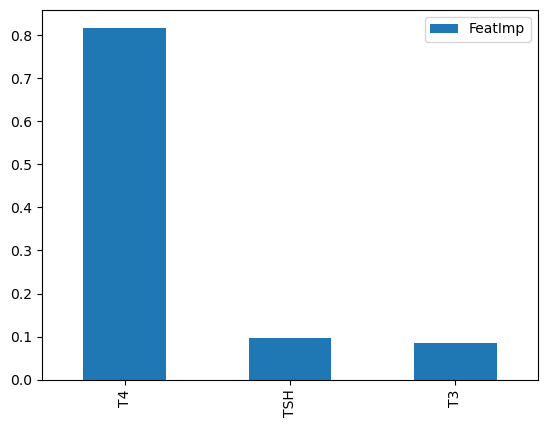

In [35]:
#Plot the Feature Importance
featimp = pd.DataFrame(model.feature_importances_)
featimp = featimp.rename({0:'FeatImp'}, axis='columns')
featimp.index = ['T3','T4','TSH']
featimp = featimp.sort_values(by=['FeatImp'], ascending=False)
featimp.plot(kind='bar')